In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.constants import k, e

import scienceplots
from scipy.integrate import simpson
plt.style.use(['science', 'notebook'])

In [3]:
def df_de(E, mu, T=300):
    kT = k * T / e
    # print(((E - mu) / kT).min(), ((E - mu) / kT).max())
    
    # return -1 / (np.cosh((E - mu) / (2 * kT))) ** 2 / kT / 4
    return -np.exp((E - mu) / kT) / ( (np.exp((E - mu) / kT) + 1) ** 2)

def L_integrant(E, mu, nu: int, T):
    if int(nu) == 0:
        return (- df_de(E, mu=mu, T=T) * np.sqrt(E) * E)
    if int(nu) == 1:
        return (- df_de(E, mu=mu, T=T) * np.sqrt(E) * E * (E - mu))

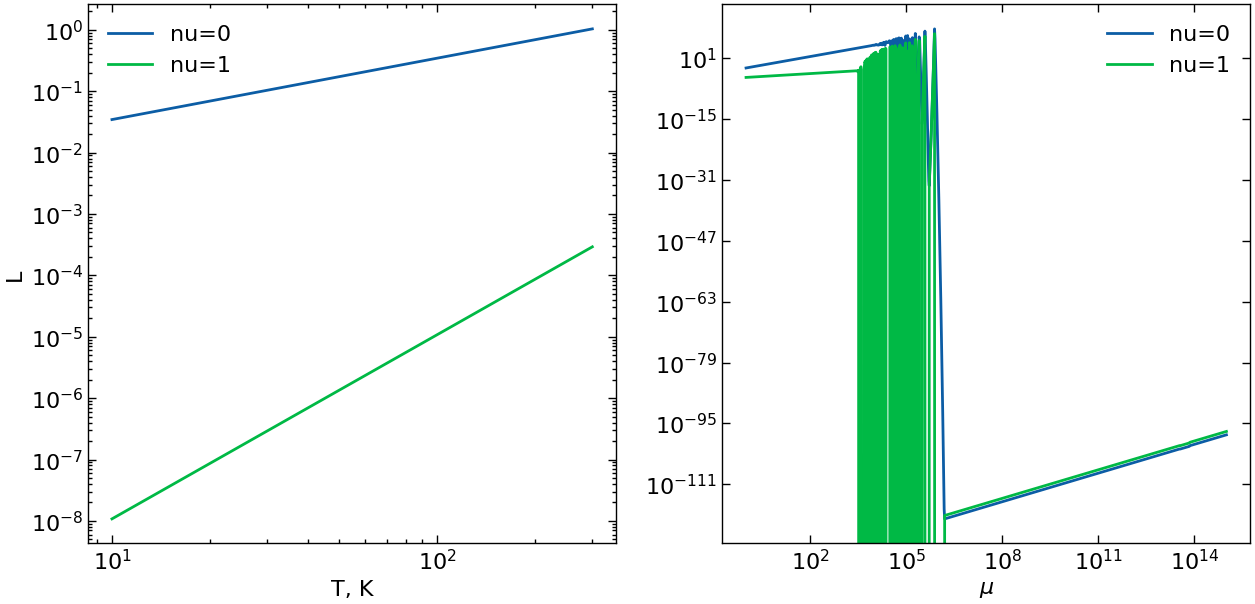

In [4]:

def L(mu, nu: int, T):
    kT = k * T / e
    # Emin = mu - 20 * kT
    # Emax = mu + 100 * kT
    
    Emin = 0
    Emax = mu + 300 * kT
    if mu < 25 * kT:
        Emax = 300 * kT
    E = np.linspace(Emin, Emax, 100000)
    integrant = L_integrant(E, mu=mu, nu=nu, T=T)
    integral = np.trapz(y=integrant, x=E)
    return integral

T_grid = np.linspace(10, 300, 100)
mu = 11.7
fig, axs = plt.subplots(ncols=2, figsize=(15, 7))
axs[0].plot(T_grid, [L(mu, 0, T) for T in T_grid], label='nu=0')
axs[0].plot(T_grid, [L(mu, 1, T) for T in T_grid], label='nu=1')
axs[0].set_ylabel('L')
axs[0].set_xlabel('T, K')
axs[0].loglog()
axs[0].legend()

mu_grid = np.logspace(0.001, 15, 1000)

axs[1].plot(mu_grid, [L(mu, 0, 300) for mu in mu_grid], label='nu=0')
axs[1].plot(mu_grid, [L(mu, 1, 300) for mu in mu_grid], label='nu=1')
axs[1].set_xlabel('$\mu$')
axs[1].loglog()
axs[1].legend()

(1.0000088341376645, 8.617333262145179e-05)

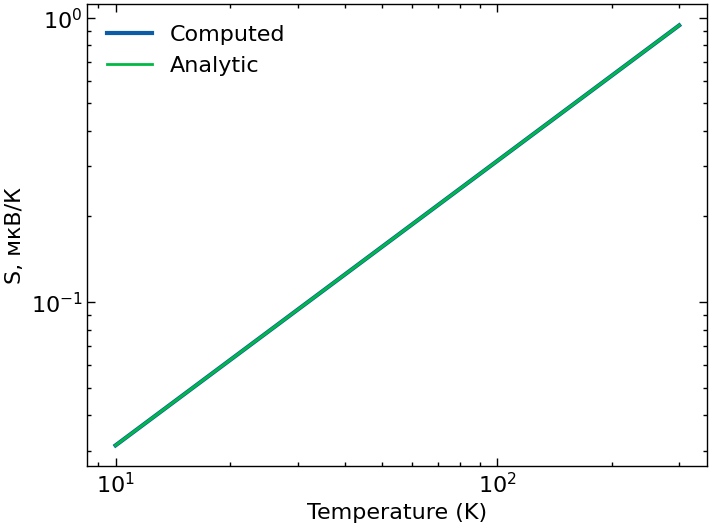

In [ ]:
S =  np.array([L(mu, 1, T) / L(mu, 0, T) for T in T_grid]) / T_grid * 1e6
S_an = np.pi ** 2 / 2 * k** 2 * T_grid / e**2 / mu * 1e6
plt.plot(T_grid, S, label='Computed', linewidth=3)
plt.plot(T_grid, S_an, label='Analytic')
plt.xlabel('Temperature (K)');
plt.ylabel('S, мкВ/К');
plt.loglog()
plt.legend();
# plt.savefig('./')
(S_an[-1] / S[-1]), k / e


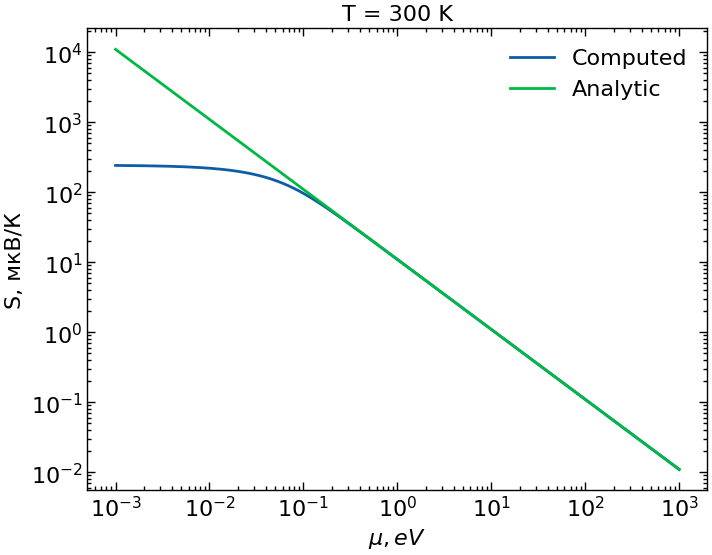

In [132]:
mu_grid = np.logspace(-3, 3, 1000)
T = 300
S =  np.array([L(mu, 1, T) / L(mu, 0, T) for mu in mu_grid]) / T * 1e6
S_an = np.pi ** 2 / 2 * k** 2 * T / e**2 / mu_grid * 1e6
plt.plot(mu_grid, S, label='Computed')
plt.plot(mu_grid, S_an, label='Analytic')
plt.xlabel('$\mu, eV$');
plt.ylabel('S, мкВ/К');
plt.title('T = 300 K')
plt.legend();
# plt.xlim(0, 15)
# plt.ylim(-1000, 10)
plt.loglog()
(S_an[-1] / S[-1]), k / e
plt.savefig('./images/S_mu.png')